In [1]:
import math
import numpy as np
from diffusions_maps import diffusion_map
from noise_dim import add_noise_dim
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib inline
plt.rcParams['figure.dpi'] = 50 # For memory saving purposes



import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

## Generating Swiss roll dataset

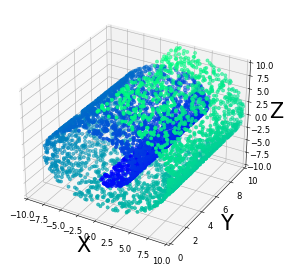

In [2]:
N_1 = 5000
#N_2 = 1000
X_es1, t1 = make_swiss_roll(N_1, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X1 = X_es1[:, 0]
Y1 = X_es1[:, 1]
Z1 = X_es1[:, 2]
X1, Y1, Z1 = 10*X1/np.max(X1), 10*Y1/np.max(Y1), 10*Z1/np.max(Z1)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X1, Y1, Z1, c=t1, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

plt.show()

In [3]:
X_es1.shape[0]


5000

In [4]:
t1

array([ 7.18191336,  6.20795018,  7.33366967, ...,  8.23916759,
        5.19519447, 10.8181326 ])

## 97 dimensions of Noise

In [5]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x16C38296A90

In [6]:
Unormal = rng.normal(loc=0, scale=1, size=(100,100))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, ...,  0.0330001 ,
        -1.42534896,  0.33281361],
       [-0.65128101,  0.8624448 , -0.12559208, ...,  0.16810587,
         0.54840545, -1.06512473],
       [ 1.82843024,  2.02007337, -1.06477104, ...,  0.66804743,
         1.78469827, -0.30968756],
       ...,
       [-1.59789882, -1.07075132, -0.02124174, ...,  0.48541752,
        -0.44586364, -0.22503676],
       [ 0.33207333, -0.7612935 , -0.99979222, ...,  2.14018605,
         0.014854  , -1.15467902],
       [-1.94705489,  1.00161437,  1.40675412, ...,  0.30125226,
        -0.77127986,  0.18548426]])

In [7]:
U, S, VT = np.linalg.svd(Unormal)

In [8]:
noise_shape = (5000,97)
noise_vals = np.random.normal(0,0.5,noise_shape)
noise_vals

array([[ 0.47342173, -0.35381641, -0.51042468, ..., -0.1736548 ,
         0.62619348,  0.08025509],
       [-0.21579476, -0.14668381,  0.01764644, ..., -0.0587606 ,
        -0.15002493,  1.14443644],
       [-0.02930492, -0.77200719,  0.80838625, ...,  0.09094941,
        -0.94473241,  1.2628604 ],
       ...,
       [ 0.46754152, -0.53414183,  0.31308221, ..., -0.05227118,
         0.98471598, -0.55441925],
       [ 0.920522  ,  0.42232165,  0.05808053, ...,  0.23757924,
         0.82835765,  0.07269266],
       [-1.43632143, -0.08297571,  0.42338938, ..., -0.65774172,
         0.31166099,  0.52537939]])

In [9]:
t_set = np.hstack((X_es1,noise_vals))
t_set.shape
t_set

array([[  4.47150101,   9.68614616,   5.62010305, ...,  -0.1736548 ,
          0.62619348,   0.08025509],
       [  6.19038897,   0.0851299 ,  -0.46661541, ...,  -0.0587606 ,
         -0.15002493,   1.14443644],
       [  3.64594004,  18.99448381,   6.36316211, ...,   0.09094941,
         -0.94473241,   1.2628604 ],
       ...,
       [ -3.09571458,   1.33648354,   7.63547208, ...,  -0.05227118,
          0.98471598,  -0.55441925],
       [  2.41195115,  15.09626019,  -4.60136254, ...,   0.23757924,
          0.82835765,   0.07269266],
       [ -1.90953038,   4.93335445, -10.64827153, ...,  -0.65774172,
          0.31166099,   0.52537939]])

In [10]:
X_es1_new = t_set @ U

In [11]:
#num_values_1 = 10
#λ_1, Φ_1 = diffusion_map(X_es1_new, num_values_1)
#print(f'λ of shape {np.shape(λ_1)} and values: \n \n {λ_1}')

In [12]:
#Φ_1_flipped = np.fliplr(Φ_1) # Flip to get in order of decending λ
#hor_axis_eigen = Φ_1_flipped.T[1]
#for i in range(2, num_values_1):
#    plt.figure()
#    plt.scatter(hor_axis_eigen, Φ_1_flipped[:,i], s=5, c=t1, cmap='winter')
#    plt.xticks(fontsize = 15)
#    plt.yticks(fontsize = 15)
#    plt.locator_params(axis='x', nbins=5)
#    plt.xlabel(fr'$\phi_1$', fontsize = 30)
#    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
#    plt.show()

## 1 dimension of noise

In [13]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x16C38296400

In [14]:
Unormal = rng.normal(loc=0, scale=1, size=(4,4))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723],
       [ 0.90535587,  0.44637457, -0.53695324,  0.5811181 ],
       [ 0.3645724 ,  0.2941325 ,  0.02842224,  0.54671299],
       [-0.73645409, -0.16290995, -0.48211931,  0.59884621]])

In [15]:
U, S, VT = np.linalg.svd(Unormal)

In [16]:
noise_shape_n1 = (5000,1)
noise_vals_n1 = np.random.normal(0,0.5,noise_shape_n1)
np.min(X_es1)

-11.040707681588836

In [17]:
t_set_n1 = np.hstack((X_es1,noise_vals_n1))
t_set_n1.shape
t_set_n1

array([[  4.47150101,   9.68614616,   5.62010305,   0.76255784],
       [  6.19038897,   0.0851299 ,  -0.46661541,  -0.21161383],
       [  3.64594004,  18.99448381,   6.36316211,  -0.07164631],
       ...,
       [ -3.09571458,   1.33648354,   7.63547208,   0.02983951],
       [  2.41195115,  15.09626019,  -4.60136254,   0.60474275],
       [ -1.90953038,   4.93335445, -10.64827153,   0.05893061]])

In [18]:
#newList_n1 = []
#for i in range(4):
#    r_n1 = t_set_n1.T[i:i+2,:].mean(axis=0)
#    newList_n1.append(r_n1)
#newArray_n1 = np.array(newList_n1)
#X_es1_n1 = newArray_n1.T
X_es1_n1 = t_set_n1 @ U

In [19]:
num_values_1 = 10
λ_n1, Φ_n1 = diffusion_map(X_es1_n1, num_values_1)
print(f'λ of shape {np.shape(λ_n1)} and values: \n \n {λ_n1}')

λ of shape (10,) and values: 
 
 [0.99657728 0.99669268 0.99721752 0.99757679 0.99780269 0.99783747
 0.99880746 0.99946509 0.99986915 1.        ]


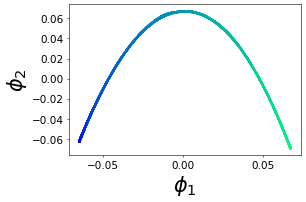

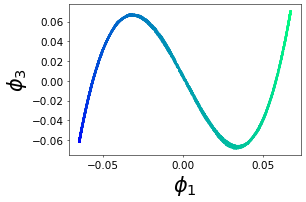

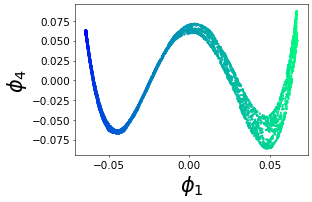

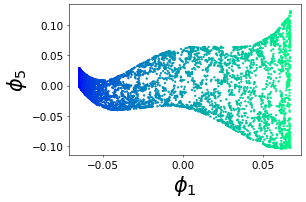

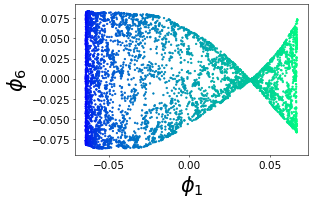

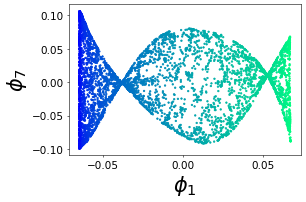

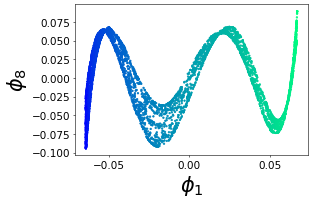

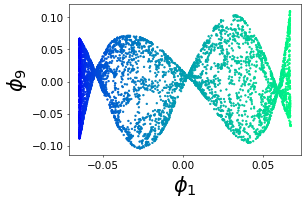

In [20]:
Φ_1_flipped_n1 = np.fliplr(Φ_n1) # Flip to get in order of decending λ
hor_axis_eigen_n1 = Φ_1_flipped_n1.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n1, Φ_1_flipped_n1[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## 1 noise dimension test

In [21]:
X_es1_n1_test = add_noise_dim(X_es1,1)

[[ 0.34558419  0.82161814  0.33043708 -1.30315723]
 [ 0.90535587  0.44637457 -0.53695324  0.5811181 ]
 [ 0.3645724   0.2941325   0.02842224  0.54671299]
 [-0.73645409 -0.16290995 -0.48211931  0.59884621]]


In [22]:
diff_mat = X_es1_n1_test - X_es1_n1
#diff_mat

array([[ 0.11456673,  0.05738242, -0.19475062, -0.0369976 ],
       [-0.23618397, -0.11829618,  0.40148631,  0.07627206],
       [ 0.04313918,  0.02160689, -0.07333179, -0.01393115],
       ...,
       [ 0.32439359,  0.16247726, -0.55143279, -0.10475802],
       [ 0.23450096,  0.11745323, -0.39862539, -0.07572855],
       [ 0.12506914,  0.0626427 , -0.21260355, -0.0403892 ]])

## 2 noise dimensions

In [23]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x16C0009A040

In [24]:
Unormal = rng.normal(loc=0, scale=1, size=(5,5))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723,  0.90535587],
       [ 0.44637457, -0.53695324,  0.5811181 ,  0.3645724 ,  0.2941325 ],
       [ 0.02842224,  0.54671299, -0.73645409, -0.16290995, -0.48211931],
       [ 0.59884621,  0.03972211, -0.29245675, -0.78190846, -0.25719224],
       [ 0.00814218, -0.27560291,  1.29406381,  1.00672432, -2.71116248]])

In [25]:
U, S, VT = np.linalg.svd(Unormal)

In [26]:
noise_shape_n2 = (5000,2)
noise_vals_n2 = np.random.normal(0,0.5,noise_shape_n2)
noise_vals_n2

array([[ 0.09541046,  1.31970217],
       [ 0.28081196,  0.12647815],
       [-0.13326733,  0.03978696],
       ...,
       [-0.09199227,  0.10758567],
       [-0.29838022, -0.05627906],
       [ 0.19785497,  0.1160186 ]])

In [27]:
t_set_n2 = np.hstack((X_es1,noise_vals_n2))
t_set_n2.shape
t_set_n2

array([[  4.47150101,   9.68614616,   5.62010305,   0.09541046,
          1.31970217],
       [  6.19038897,   0.0851299 ,  -0.46661541,   0.28081196,
          0.12647815],
       [  3.64594004,  18.99448381,   6.36316211,  -0.13326733,
          0.03978696],
       ...,
       [ -3.09571458,   1.33648354,   7.63547208,  -0.09199227,
          0.10758567],
       [  2.41195115,  15.09626019,  -4.60136254,  -0.29838022,
         -0.05627906],
       [ -1.90953038,   4.93335445, -10.64827153,   0.19785497,
          0.1160186 ]])

In [28]:
#newList_n2 = []
#for i in range(5):
#    r_n2 = t_set_n2.T[i:i+2,:].mean(axis=0)
#    newList_n2.append(r_n2)
#newArray_n2 = np.array(newList_n2)
#X_es1_n2 = newArray_n2.T
X_es1_n2 = t_set_n2 @ U

In [29]:
num_values_1 = 10
λ_n2, Φ_n2 = diffusion_map(X_es1_n2, num_values_1)
print(f'λ of shape {np.shape(λ_n2)} and values: \n \n {λ_n2}')

λ of shape (10,) and values: 
 
 [0.99672515 0.99685313 0.99729504 0.99767293 0.99791467 0.99793484
 0.99885029 0.99948678 0.99987354 1.        ]


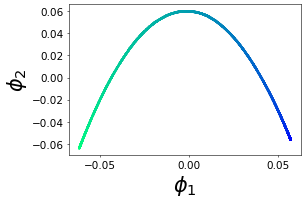

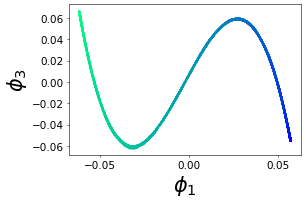

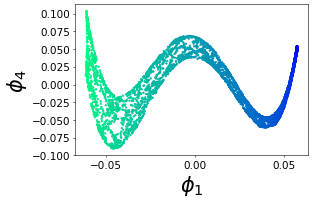

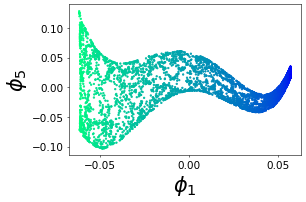

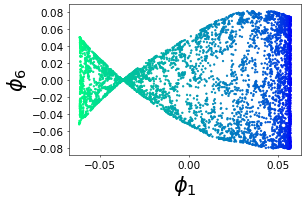

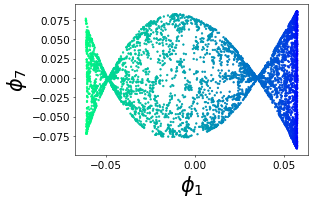

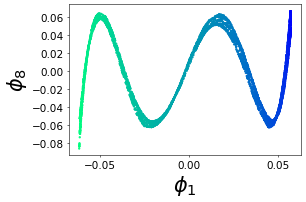

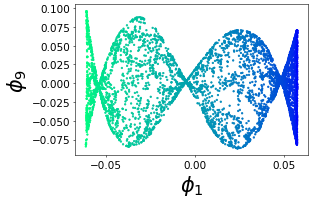

In [30]:
Φ_1_flipped_n2 = np.fliplr(Φ_n2) # Flip to get in order of decending λ
hor_axis_eigen_n2 = Φ_1_flipped_n2.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n2, Φ_1_flipped_n2[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## 5 noise dimensions

In [31]:
rng = np.random.default_rng(1)
rng

Generator(PCG64) at 0x16C382968B0

In [32]:
Unormal = rng.normal(loc=0, scale=1, size=(8,8))
Unormal

array([[ 0.34558419,  0.82161814,  0.33043708, -1.30315723,  0.90535587,
         0.44637457, -0.53695324,  0.5811181 ],
       [ 0.3645724 ,  0.2941325 ,  0.02842224,  0.54671299, -0.73645409,
        -0.16290995, -0.48211931,  0.59884621],
       [ 0.03972211, -0.29245675, -0.78190846, -0.25719224,  0.00814218,
        -0.27560291,  1.29406381,  1.00672432],
       [-2.71116248, -1.88901325, -0.17477209, -0.42219041,  0.213643  ,
         0.21732193,  2.11783876, -1.11202076],
       [-0.37760501,  2.04277161,  0.646703  ,  0.66306337, -0.51400637,
        -1.64807517,  0.16746474,  0.10901409],
       [-1.22735205, -0.68322666, -0.07204368, -0.94475162, -0.09826997,
         0.09548303,  0.03558624, -0.50629166],
       [ 0.59374807,  0.89116695,  0.3208483 , -0.81823023,  0.73165228,
        -0.50144002,  0.87916062, -1.07178742],
       [ 0.9144672 , -0.02006345, -1.24874889, -0.31389947,  0.05410228,
         0.27279134, -0.98218812, -1.10737305]])

In [33]:
U, S, VT = np.linalg.svd(Unormal)

In [34]:
noise_shape_n5 = (5000,5)
noise_vals_n5 = np.random.normal(0,0.5,noise_shape_n5)
noise_vals_n5

array([[ 0.75529842, -0.34795734, -0.56662379, -0.51478666, -0.80867732],
       [-0.02914848, -0.36446888,  0.37482513, -0.17196443,  0.13275764],
       [ 0.05051688,  0.21850405,  0.61141694,  0.76362527, -0.19354372],
       ...,
       [-0.75537654,  0.37176246, -0.77274685,  0.34785995, -0.06591296],
       [ 0.34786065,  0.4986967 , -0.38977126, -0.06568407,  1.18362164],
       [ 0.55120244,  0.99712348,  0.44228001, -0.00930979, -0.16352303]])

In [35]:
t_set_n5 = np.hstack((X_es1,noise_vals_n5))
t_set_n5.shape
t_set_n5

array([[ 4.47150101e+00,  9.68614616e+00,  5.62010305e+00, ...,
        -5.66623790e-01, -5.14786657e-01, -8.08677319e-01],
       [ 6.19038897e+00,  8.51299009e-02, -4.66615408e-01, ...,
         3.74825127e-01, -1.71964431e-01,  1.32757644e-01],
       [ 3.64594004e+00,  1.89944838e+01,  6.36316211e+00, ...,
         6.11416939e-01,  7.63625269e-01, -1.93543724e-01],
       ...,
       [-3.09571458e+00,  1.33648354e+00,  7.63547208e+00, ...,
        -7.72746852e-01,  3.47859952e-01, -6.59129640e-02],
       [ 2.41195115e+00,  1.50962602e+01, -4.60136254e+00, ...,
        -3.89771260e-01, -6.56840695e-02,  1.18362164e+00],
       [-1.90953038e+00,  4.93335445e+00, -1.06482715e+01, ...,
         4.42280012e-01, -9.30979400e-03, -1.63523027e-01]])

In [36]:
X_es1_n5 = t_set_n5 @ U
X_es1_n5

array([[ -1.18386921,  -0.84357169,   2.42311811, ...,  -4.15808668,
          2.70818649,  -8.80979863],
       [ -0.95026537,   1.48376299,  -2.79756353, ...,  -1.41425749,
         -1.6588341 ,  -1.92880612],
       [ -3.22212143,  -1.90754384,   4.73982993, ...,  -6.34282031,
          8.17609923, -15.53755255],
       ...,
       [  0.25167294,  -1.79964377,   2.59191443, ...,  -2.40424277,
          1.72657444,   0.67740584],
       [ -3.92645033,  -0.10871308,   3.24253155, ...,  -1.17112991,
          4.86037182, -13.61845396],
       [ -1.57744335,  -0.41321754,   1.19995794, ...,   3.88590867,
          2.12225223,  -4.39551861]])

In [37]:
num_values_1 = 10
λ_n5, Φ_n5 = diffusion_map(X_es1_n5, num_values_1)
print(f'λ of shape {np.shape(λ_n5)} and values: \n \n {λ_n5}')

λ of shape (10,) and values: 
 
 [0.99725088 0.99739805 0.99774063 0.9980465  0.99827205 0.99831952
 0.99905158 0.99957792 0.99989498 1.        ]


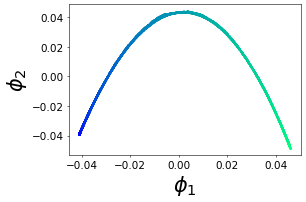

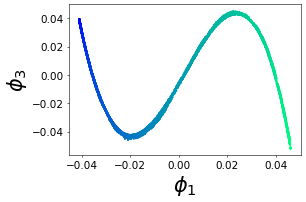

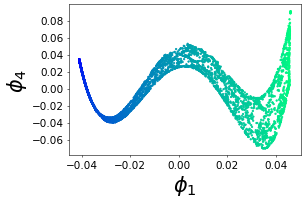

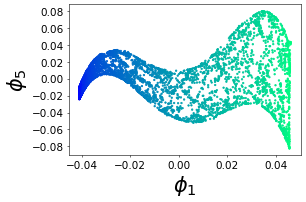

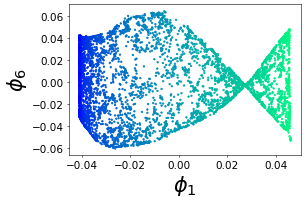

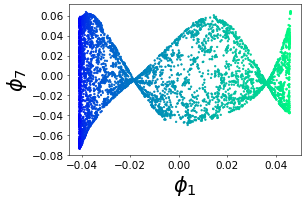

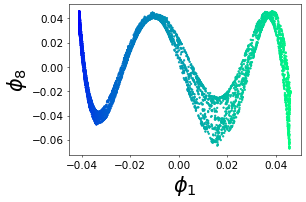

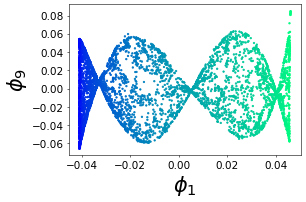

In [38]:
Φ_1_flipped_n5 = np.fliplr(Φ_n5) # Flip to get in order of decending λ
hor_axis_eigen_n5 = Φ_1_flipped_n5.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n5, Φ_1_flipped_n5[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## 5 noise dim check

In [39]:
X_es1_n5_test = add_noise_dim(X_es1,5)
X_es1_n5_test

[[ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
  -0.53695324  0.5811181 ]
 [ 0.3645724   0.2941325   0.02842224  0.54671299 -0.73645409 -0.16290995
  -0.48211931  0.59884621]
 [ 0.03972211 -0.29245675 -0.78190846 -0.25719224  0.00814218 -0.27560291
   1.29406381  1.00672432]
 [-2.71116248 -1.88901325 -0.17477209 -0.42219041  0.213643    0.21732193
   2.11783876 -1.11202076]
 [-0.37760501  2.04277161  0.646703    0.66306337 -0.51400637 -1.64807517
   0.16746474  0.10901409]
 [-1.22735205 -0.68322666 -0.07204368 -0.94475162 -0.09826997  0.09548303
   0.03558624 -0.50629166]
 [ 0.59374807  0.89116695  0.3208483  -0.81823023  0.73165228 -0.50144002
   0.87916062 -1.07178742]
 [ 0.9144672  -0.02006345 -1.24874889 -0.31389947  0.05410228  0.27279134
  -0.98218812 -1.10737305]]


array([[ -2.56148144,  -1.45609499,   1.79328642, ...,  -4.80300813,
          2.48457533,  -8.68494582],
       [ -1.41891844,   0.87831498,  -3.47954106, ...,  -1.53570797,
         -1.75413033,  -2.07253178],
       [ -3.2946568 ,  -1.6156901 ,   5.12390167, ...,  -5.65550445,
          7.41883936, -15.93495486],
       ...,
       [  1.81962641,  -1.93747423,   2.6584302 , ...,  -2.49093142,
          2.86378044,   0.98514453],
       [ -4.00171257,  -0.33601505,   3.27593105, ...,  -0.76096472,
          5.26524062, -13.42547879],
       [ -2.24655459,   0.7964813 ,   1.68300915, ...,   4.67182789,
          1.85896148,  -4.44995124]])

In [40]:
num_values_1 = 10
λ_n5_test, Φ_n5_test = diffusion_map(X_es1_n5_test, num_values_1)
print(f'λ of shape {np.shape(λ_n5_test)} and values: \n \n {λ_n5_test}')

λ of shape (10,) and values: 
 
 [0.99723798 0.99735484 0.99770475 0.99800432 0.99825731 0.99830809
 0.99905151 0.99957253 0.99989639 1.        ]


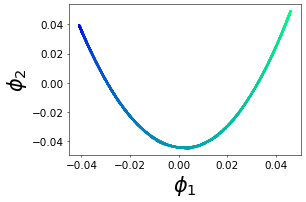

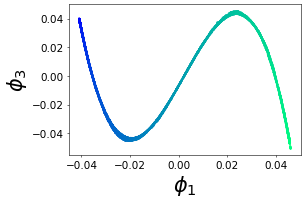

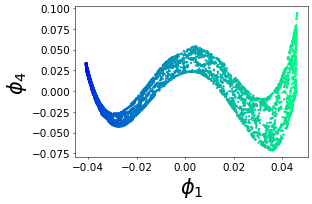

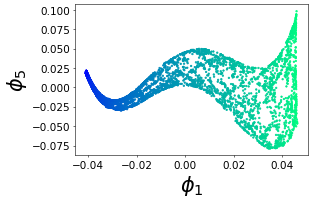

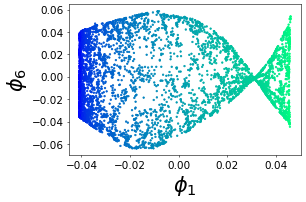

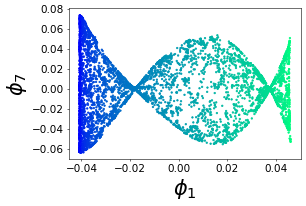

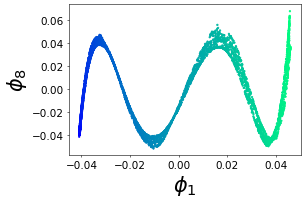

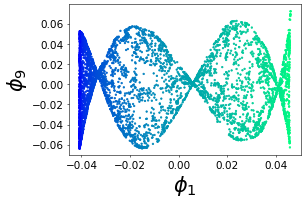

In [41]:
Φ_1_flipped_n5_test = np.fliplr(Φ_n5_test) # Flip to get in order of decending λ
hor_axis_eigen_n5_test = Φ_1_flipped_n5_test.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen_n5_test, Φ_1_flipped_n5_test[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Plotting Eigen functions against each other

In [42]:
num_values_1 = 10
λ_1, Φ_1 = diffusion_map(X_es1, num_values_1)
print(f'λ of shape {np.shape(λ_1)} and values: \n \n {λ_1}')

λ of shape (10,) and values: 
 
 [0.99644983 0.99656431 0.99712197 0.99750255 0.99770489 0.9977625
 0.99876528 0.99944838 0.99986369 1.        ]


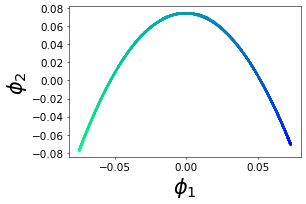

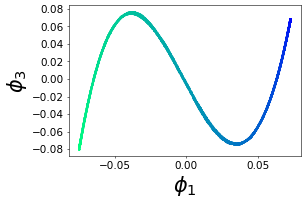

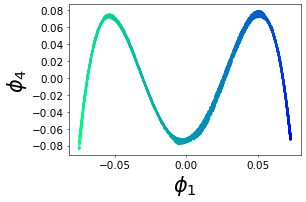

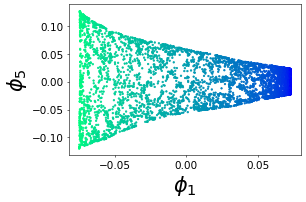

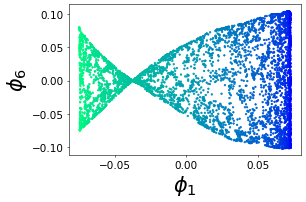

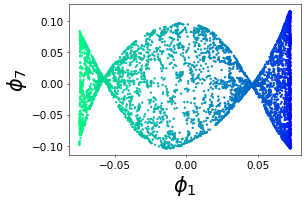

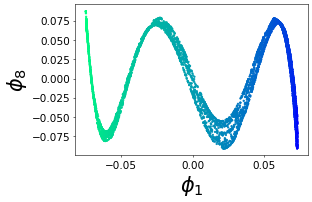

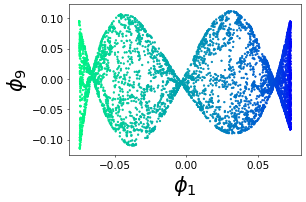

In [43]:
Φ_1_flipped = np.fliplr(Φ_1) # Flip to get in order of decending λ
hor_axis_eigen = Φ_1_flipped.T[1]
for i in range(2, num_values_1):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_1_flipped[:,i], s=5, c=t1, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Using datafold to get the plots

In [44]:
data = np.column_stack((X1, Y1, Z1))

X_pcm = pfold.PCManifold(data)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.2939699141674344, cut-off = 2.3270423153018487


In [45]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

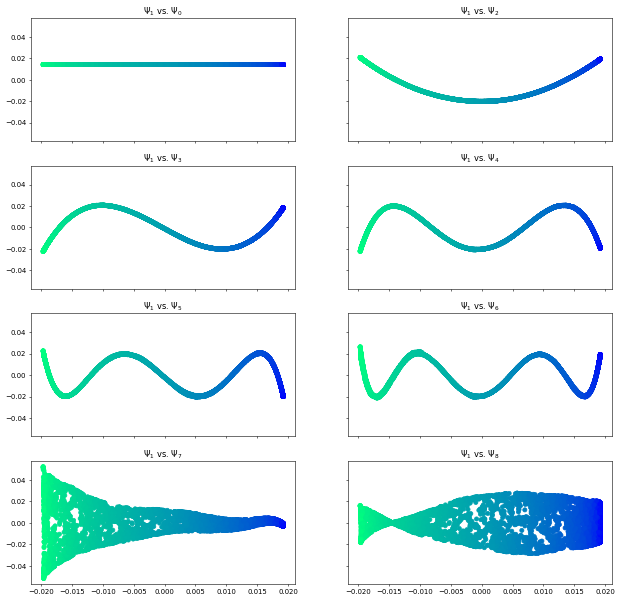

In [46]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(c=t1, cmap='winter'),
)

## PCA analysis on the Swiss-roll dataset

In [47]:
data = np.column_stack((X1, Y1, Z1))
pca = PCA(n_components=3)
pca.fit(data)
reduced = pca.transform(data)

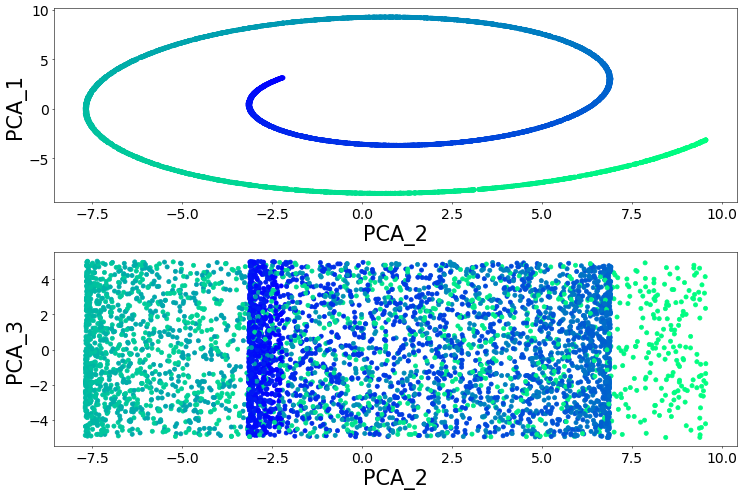

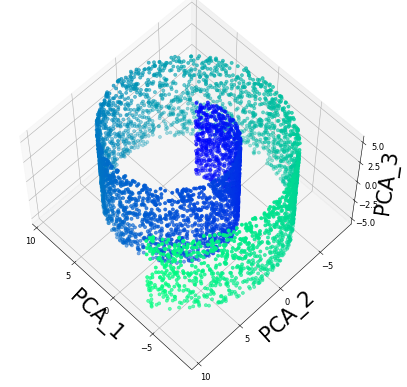

In [48]:
# Visualise
fig1, ax1 = plt.subplots(2,1,figsize=(15,10))

ax1[0].scatter(reduced[:,1], reduced[:,0], c=t1, cmap='winter')
ax1[0].tick_params(axis='x', labelsize=20)
ax1[0].tick_params(axis='y', labelsize=20)
ax1[0].set_xlabel("PCA_2", fontsize = 30)
ax1[0].set_ylabel("PCA_1", fontsize = 30)

ax1[1].scatter(reduced[:,1], reduced[:,2], c=t1, cmap='winter')
ax1[1].tick_params(axis='x', labelsize=20)
ax1[1].tick_params(axis='y', labelsize=20)
ax1[1].set_xlabel("PCA_2", fontsize = 30)
ax1[1].set_ylabel("PCA_3", fontsize = 30)

fig1.tight_layout()

fig2 = plt.figure(figsize=(10, 15))
ax2 = fig2.add_subplot(211, projection='3d')

ax2.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=t1, cmap='winter')
ax2.tick_params(labelsize = 'larger')
plt.locator_params(nbins=5)
ax2.set_xlabel("PCA_1", fontsize = 30)
ax2.set_ylabel("PCA_2", fontsize = 30)
ax2.set_zlabel("PCA_3", fontsize = 30)

ax2.view_init(60, 135)

fig2.tight_layout()

## Generating S-curve dataset

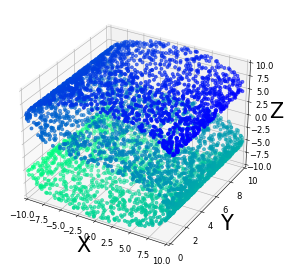

In [49]:
N_2 = 5000
#N_2 = 1000
X_es2, t2 = make_s_curve(N_2, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X2 = X_es2[:, 0]
Y2 = X_es2[:, 1]
Z2 = X_es2[:, 2]
X2, Y2, Z2 = 10*X2/np.max(X2), 10*Y2/np.max(Y2), 10*Z2/np.max(Z2)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X2, Y2, Z2, c=t2, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

plt.show()

In [50]:
num_values_2 = 10
λ_2, Φ_2 = diffusion_map(X_es2, num_values_2)
print(f'λ of shape {np.shape(λ_2)} and values: \n \n {λ_2}')

λ of shape (10,) and values: 
 
 [0.66018137 0.69654678 0.71698529 0.74508655 0.76004528 0.79923392
 0.88063601 0.94527914 0.98628597 1.        ]


## Plotting Eigen functions against each other

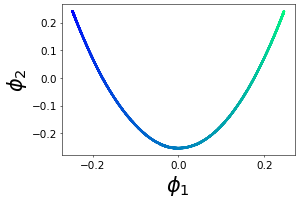

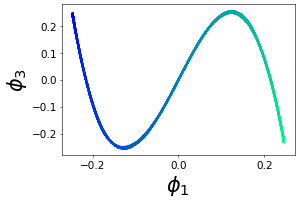

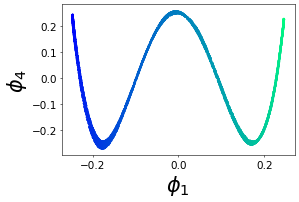

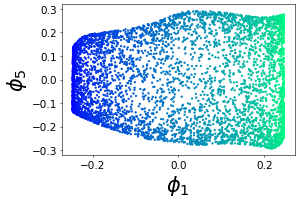

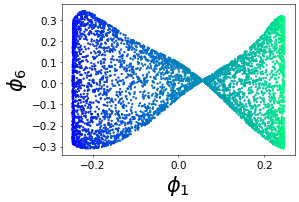

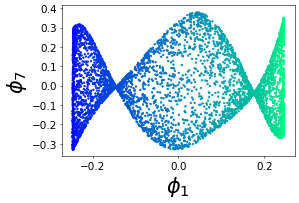

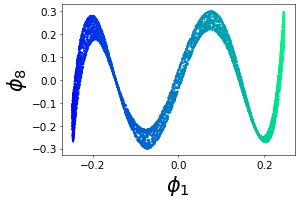

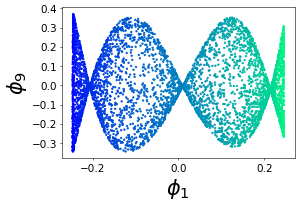

In [51]:
Φ_2_flipped = np.fliplr(Φ_2) # Flip to get in order of decending λ
hor_axis_eigen = Φ_2_flipped.T[1]
for i in range(2, num_values_2):
    plt.figure()
    plt.scatter(hor_axis_eigen, Φ_2_flipped[:,i], s=5, c=t2, cmap='winter')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.locator_params(axis='x', nbins=5)
    plt.xlabel(fr'$\phi_1$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i}$', fontsize = 30)
    plt.show()

## Using datafold to get the plots

In [52]:
data = np.column_stack((X2, Y2, Z2))

X_pcm = pfold.PCManifold(data)
X_pcm.optimize_parameters()

print(f"epsilon = {X_pcm.kernel.epsilon}, cut-off = {X_pcm.cut_off}")

epsilon = 0.18547843223473817, cut-off = 1.8484152631605582


In [53]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

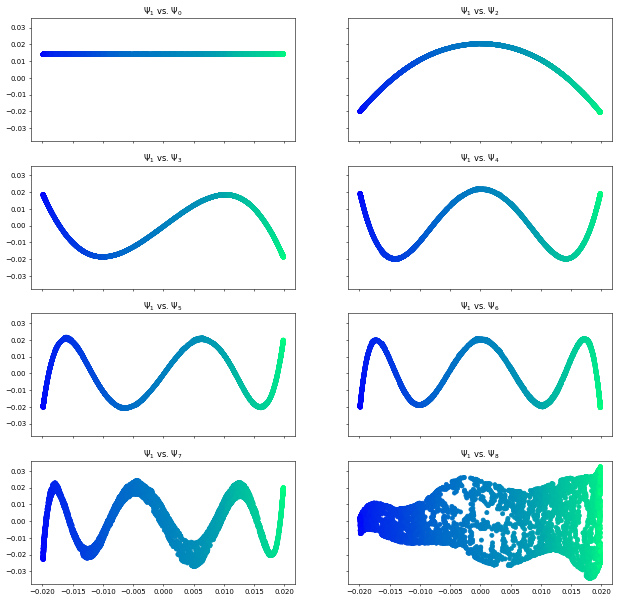

In [54]:
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(c=t2, cmap='winter'),
)

## PCA analysis on the Swiss-roll dataset

In [55]:
data = np.column_stack((X2, Y2, Z2))
pca = PCA(n_components=3)
pca.fit(data)
reduced = pca.transform(data)

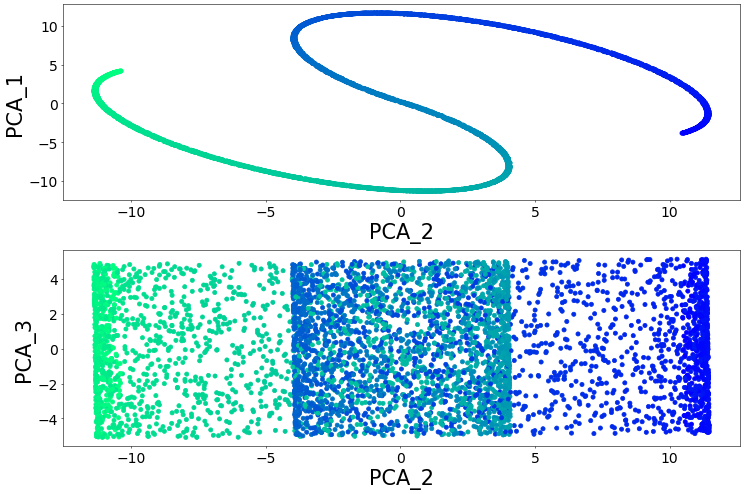

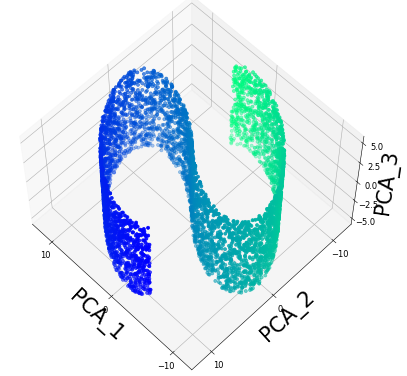

In [56]:
# Visualise
fig1, ax1 = plt.subplots(2,1,figsize=(15,10))

ax1[0].scatter(reduced[:,1], reduced[:,0], c=t2, cmap='winter')
ax1[0].tick_params(axis='x', labelsize=20)
ax1[0].tick_params(axis='y', labelsize=20)
ax1[0].set_xlabel("PCA_2", fontsize = 30)
ax1[0].set_ylabel("PCA_1", fontsize = 30)

ax1[1].scatter(reduced[:,1], reduced[:,2], c=t2, cmap='winter')
ax1[1].tick_params(axis='x', labelsize=20)
ax1[1].tick_params(axis='y', labelsize=20)
ax1[1].set_xlabel("PCA_2", fontsize = 30)
ax1[1].set_ylabel("PCA_3", fontsize = 30)

fig1.tight_layout()

fig2 = plt.figure(figsize=(10, 15))
ax2 = fig2.add_subplot(211, projection='3d')

ax2.scatter(reduced[:,0], reduced[:,1], reduced[:,2], c=t2, cmap='winter')
ax2.tick_params(labelsize = 'larger')
plt.locator_params(nbins=5)
ax2.set_xlabel("PCA_1", fontsize = 30)
ax2.set_ylabel("PCA_2", fontsize = 30)
ax2.set_zlabel("PCA_3", fontsize = 30)

ax2.view_init(60, 135)

fig2.tight_layout()